In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/beerreviews/beer_reviews.csv


In [2]:
beer_data = pd.read_csv('/kaggle/input/beerreviews/beer_reviews.csv')

beer_data.head(20)

beer_data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


In [3]:
beer_data.dtypes

brewery_id              int64
brewery_name           object
review_time             int64
review_overall        float64
review_aroma          float64
review_appearance     float64
review_profilename     object
beer_style             object
review_palate         float64
review_taste          float64
beer_name              object
beer_abv              float64
beer_beerid             int64
dtype: object

In [4]:
beer_data.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [5]:
beer_data.isna().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [6]:
beer_data = beer_data.dropna()

beer_data.isna().sum()

brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64

In [7]:
beer_data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


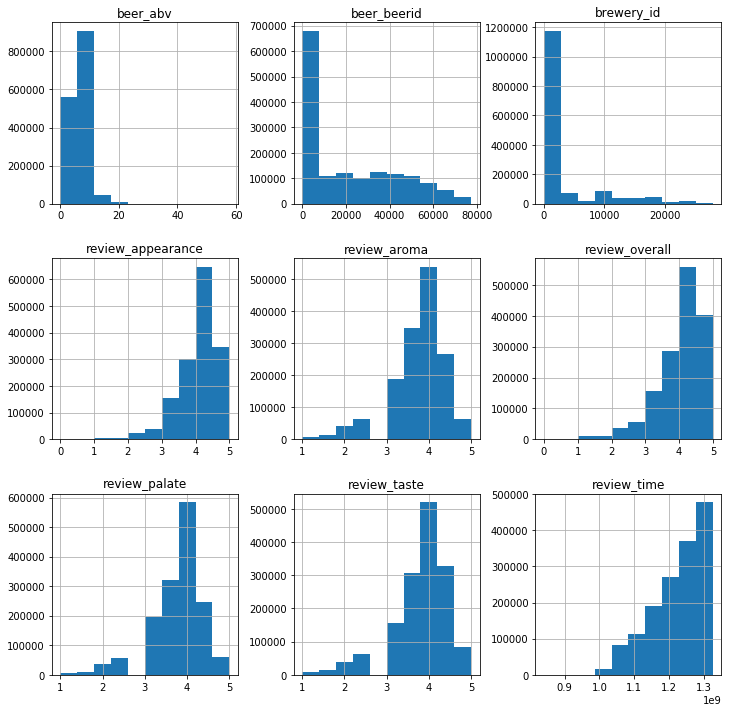

In [8]:
import matplotlib.pyplot as plt

beer_data.hist(figsize=(12,12))

plt.show()


In [9]:
beers_abv = beer_data.loc[:,['brewery_name','beer_name','beer_abv']]

beers_abv = beers_abv.groupby(['brewery_name','beer_name'])['beer_abv'].mean()

beers_abv = pd.DataFrame(data=beers_abv).reset_index()

beers_abv

,brewery_name,beer_name,beer_abv
0,'t Hofbrouwerijke,Blondelle,8.0
1,'t Hofbrouwerijke,Bosprotter,8.5
2,'t Hofbrouwerijke,Hof Korvatunturi,11.0
3,'t Hofbrouwerijke,Hofblues,5.5
4,'t Hofbrouwerijke,Hofdraak,6.5
...,...,...,...
48799,Ørbæk Bryggeri,Nutty Nut Brown Ale,5.0
48800,Ørbæk Bryggeri,Old Danish Braggot,10.1
48801,Ørbæk Bryggeri,Pale Ale,5.0
48802,Ørbæk Bryggeri,WeissBier Hyldeblomst,5.0


****Is "review_taste" correllated with "review_overall"?****

**How does ABV relate?**

In [10]:
beer_style_taste_abv = beer_data.loc[:,['beer_style','review_taste','review_overall','beer_abv']]

beer_style_taste_abv = beer_style_taste_abv.groupby('beer_style')['review_taste','review_overall','beer_abv'].mean()

beer_style_taste_abv = pd.DataFrame(data=beer_style_taste_abv)

beer_style_taste_abv = beer_style_taste_abv.sort_values(by=['review_taste'],ascending=False).reset_index()

beer_style_taste_abv

,beer_style,review_taste,review_overall,beer_abv
0,Quadrupel (Quad),4.212530,4.073156,10.461493
1,Eisbock,4.211182,3.975444,11.392852
2,American Double / Imperial Stout,4.188474,4.030536,10.605530
3,American Wild Ale,4.161021,4.100379,7.713634
4,Russian Imperial Stout,4.151599,4.024652,9.986842
...,...,...,...,...
99,American Adjunct Lager,2.686335,3.010392,4.861821
100,Happoshu,2.647679,2.913502,5.265823
101,American Malt Liquor,2.538793,2.677769,7.370588
102,Low Alcohol Beer,2.435294,2.551961,0.566706


In [11]:
import plotly.express as px

import statsmodels

fig = px.scatter(beer_style_taste_abv,x="review_overall",y="review_taste",trendline="ols")

fig.show()

In [12]:
fig = px.scatter(beer_style_taste_abv,x="review_overall",y="beer_abv",trendline="ols")

fig.show()

In [13]:
fig = px.scatter(beer_style_taste_abv,x="review_overall",y="review_taste",color='beer_style',size='beer_abv')

fig.show()

What breweries make various beer styles?

In [14]:
brewery_style = beer_data.loc[:,['brewery_name','beer_style','beer_abv']]


brewery_style

,brewery_name,beer_style,beer_abv
0,Vecchio Birraio,Hefeweizen,5.0
1,Vecchio Birraio,English Strong Ale,6.2
2,Vecchio Birraio,Foreign / Export Stout,6.5
3,Vecchio Birraio,German Pilsener,5.0
4,Caldera Brewing Company,American Double / Imperial IPA,7.7
...,...,...,...
1586609,The Defiant Brewing Company,Pumpkin Ale,5.2
1586610,The Defiant Brewing Company,Pumpkin Ale,5.2
1586611,The Defiant Brewing Company,Pumpkin Ale,5.2
1586612,The Defiant Brewing Company,Pumpkin Ale,5.2


One of my favorite styles is Flanders Red

What breweries make it? Distribution of the ABV?

In [15]:
flanders_style = brewery_style.query('beer_style == "Flanders Red Ale"').reset_index(drop=True)

flanders_style = flanders_style.groupby(['brewery_name'])['beer_abv'].mean()

flanders_style = flanders_style.reset_index()

flanders_style

,brewery_name,beer_abv
0,Ale Industries,6.300000
1,Alpine Beer Company,5.170000
2,Amager Bryghus,6.200000
3,BJ's Restaurant & Brewery,7.214286
4,Barrel House Brewing Company,4.500000
...,...,...
72,Two Brothers Brewing Company,6.000000
73,Upstream Brewing Company - Old Market,6.000000
74,Wig And Pen,6.250000
75,Willimantic Brewing Co.,6.200000


In [16]:
fig = px.scatter(flanders_style,x="brewery_name",y="beer_abv")

fig.show()

Another style I like is Gose

In [17]:
gose_style = brewery_style.query('beer_style == "Gose"').reset_index()

gose_style = brewery_style.groupby(['brewery_name'])['beer_abv'].mean()

gose_style = gose_style.reset_index()

gose_style

,brewery_name,beer_abv
0,'t Hofbrouwerijke,6.789189
1,(512) Brewing Company,7.149662
2,10 Barrel Brewing Co.,6.066667
3,1516 Brewing Company,6.266667
4,16 Mile Brewing Company,6.033696
...,...,...
5150,Ölvisholt Brugghús,7.102062
5151,Öufi Brauerei,4.700000
5152,Ølfabrikken,8.016041
5153,Ørbæk Bryggeri,5.838889


In [18]:
fig = px.scatter(gose_style,x="brewery_name",y="beer_abv")

fig.show()

In [19]:
beer_style_taste_abv

,beer_style,review_taste,review_overall,beer_abv
0,Quadrupel (Quad),4.212530,4.073156,10.461493
1,Eisbock,4.211182,3.975444,11.392852
2,American Double / Imperial Stout,4.188474,4.030536,10.605530
3,American Wild Ale,4.161021,4.100379,7.713634
4,Russian Imperial Stout,4.151599,4.024652,9.986842
...,...,...,...,...
99,American Adjunct Lager,2.686335,3.010392,4.861821
100,Happoshu,2.647679,2.913502,5.265823
101,American Malt Liquor,2.538793,2.677769,7.370588
102,Low Alcohol Beer,2.435294,2.551961,0.566706


What is the distribution of ABV across styles?

In [20]:
fig = px.scatter(beer_style_taste_abv,x="beer_style",y="beer_abv")

fig.show()

In [21]:
style_count = brewery_style['beer_style'].value_counts()

style_count = pd.DataFrame(data=style_count).reset_index()

style_count = style_count.rename(columns={"index":"style","beer_style":"count"})

style_count

,style,count
0,American IPA,113144
1,American Double / Imperial IPA,85105
2,American Pale Ale (APA),58072
3,Russian Imperial Stout,53424
4,American Double / Imperial Stout,50137
...,...,...
99,English Pale Mild Ale,648
100,Faro,608
101,Roggenbier,395
102,Happoshu,237


Beer quantities per style?

In [22]:
fig = px.bar(style_count,x="style",y="count")

fig.show()

What are some properties of the reviewers?

In [23]:
reviewers = beer_data.loc[:,['review_profilename','beer_name','review_overall']]

reviewers

,review_profilename,beer_name,review_overall
0,stcules,Sausa Weizen,1.5
1,stcules,Red Moon,3.0
2,stcules,Black Horse Black Beer,3.0
3,stcules,Sausa Pils,3.0
4,johnmichaelsen,Cauldron DIPA,4.0
...,...,...,...
1586609,maddogruss,The Horseman's Ale,5.0
1586610,yelterdow,The Horseman's Ale,4.0
1586611,TongoRad,The Horseman's Ale,4.5
1586612,dherling,The Horseman's Ale,4.0


In [24]:
reviewers = beer_data.loc[:,['review_profilename','review_overall']]

reviewers

,review_profilename,review_overall
0,stcules,1.5
1,stcules,3.0
2,stcules,3.0
3,stcules,3.0
4,johnmichaelsen,4.0
...,...,...
1586609,maddogruss,5.0
1586610,yelterdow,4.0
1586611,TongoRad,4.5
1586612,dherling,4.0


In [25]:
#reviewers_count = reviewers['review_profilename']

reviewers_count = reviewers['review_profilename'].value_counts().reset_index()

reviewers_count = reviewers_count.rename(columns={"index":"review_profilename","review_profilename":"count"})

reviewers_count

,review_profilename,count
0,northyorksammy,5346
1,mikesgroove,4283
2,BuckeyeNation,4246
3,Thorpe429,3273
4,brentk56,3186
...,...,...
32903,nrt7234,1
32904,pizzanuts,1
32905,bigstoutman,1
32906,arejohnston,1


In [26]:
reviewers_count.dtypes

review_profilename    object
count                  int64
dtype: object

In [27]:
reviewers = reviewers.groupby('review_profilename')['review_overall'].mean()

reviewers = reviewers.round().astype('int64').reset_index()

reviewers

,review_profilename,review_overall
0,0110x011,4
1,01Ryan10,5
2,02maxima,4
3,03SVTCobra,3
4,04101Brewer,4
...,...,...
32903,zymurgy4all,4
32904,zymurgywhiz,4
32905,zythus,4
32906,zyzygy,4


In [28]:
reviewers = reviewers.merge(reviewers_count,on='review_profilename')

reviewers

,review_profilename,review_overall,count
0,0110x011,4,137
1,01Ryan10,5,1
2,02maxima,4,4
3,03SVTCobra,3,3
4,04101Brewer,4,3
...,...,...,...
32903,zymurgy4all,4,89
32904,zymurgywhiz,4,2
32905,zythus,4,8
32906,zyzygy,4,5


In [29]:
reviewers.describe()

,review_overall,count
count,32908.000000,32908.000000
mean,3.929045,46.143126
std,0.638303,172.730415
min,1.000000,1.000000
25%,4.000000,1.000000
50%,4.000000,3.000000
75%,4.000000,16.000000
max,5.000000,5346.000000


In [30]:
reviewers.shape

(32908, 3)

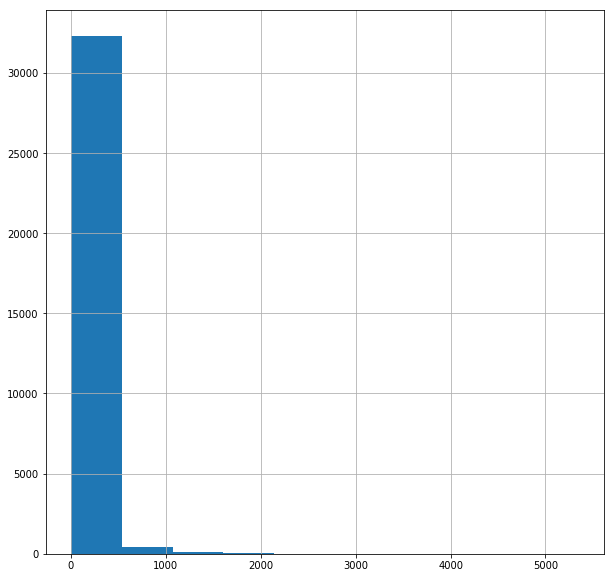

In [31]:
#reviewers['count'] = reviewers['count'] != 0

reviewers['count'].hist(figsize=(10,10))

In [32]:
reviewers = reviewers.query("count > 1000")

fig = px.bar(reviewers,x="review_profilename",y="count")

fig.show()